## In this notebook I'm going to try use Decision Tree's

The idea here is that I'm going to use a simple decision tree model to try to determine what flower species it is given a couple of columns that represent the species characteristics

With a decision Tree we need to define some things up front, our features/variables/arguments which are basically describing what values our category (Species) has, so we are going to try and see can we determine the correct species using just a few values and with what level of accuracy we can make such predictions.

Drew inspiration from the following articles/resources:

https://www.kaggle.com/learn/intro-to-machine-learning
    
https://towardsdatascience.com/scikit-learn-decision-trees-explained-803f3812290d


In [2]:
import pandas as pd
#from sklearn.tree import DecisionTreeRegressor #specify the model originally I used DecisionTreeRegressor
'''Originally I used a DecisionTreeRegressor, but later learned DecisionTreeClassifier is more appropriate for 
this kind of data where we have are trying to predict a category e.g. species not a value e.g. petal length'''
from sklearn.tree import DecisionTreeClassifier, plot_tree #importing the DecisionTreeClassifier from sklearn tree library

#iris_df is the dataframe storing the full iris dataset
iris_df = pd.read_csv('..\iris-flower-dataset\IRIS.csv')

#y is the species of iris flowers, we'll be trying to predict this using our other columns, this is my first step in splitting the data for the model
y = iris_df['species']
species_names = y.unique()

#Features, these are my columns of interest that I think will factor into determining flower species
feature_names = ['petal_width', 'petal_length', 'sepal_width', 'sepal_length']

#X is a dataframe of just the columns from feature_names
X = iris_df[feature_names]

#define iris_model object from DecisionTreeRegressor, using random_state=0 as it makes the result consistent
iris_model = DecisionTreeClassifier(random_state=0)

iris_model.fit(X,y)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

By this point we've:
- Loaded in our dataset
- Defined our y which is the Species, this is the value we want to determine from our features
- Defined our features for which I'm using all remaining columns
- I convert the the Species to numeric equivalents as the model can't work with strings
- I define a Decision Tree Regressor Object
- Fit the model

In [3]:
model_score = iris_model.score(X,y)
print(model_score)
predictions = iris_model.predict(X)
#print(predictions)
#print(y)

1.0


Scoring the model, we get 1, what this means is that using X to predict y with this model we get a 100% accuracy. Or at least we have 100% accuracy for this sample, in order to get a more realistic interpretation of this I'm now going to split up this data into a training and validating set.

In [4]:
from sklearn import tree
from matplotlib import pyplot as plt
#tree.plot_tree(iris_model)
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,10), dpi=400)
tree.plot_tree(iris_model,
               feature_names = feature_names, 
               class_names=species_names,
               filled = True)

[Text(1550.0, 2823.3333333333335, 'petal_length <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]\nclass = Iris-setosa'),
 Text(1311.5384615384614, 2310.0, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]\nclass = Iris-setosa'),
 Text(1788.4615384615383, 2310.0, 'petal_width <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]\nclass = Iris-versicolor'),
 Text(953.8461538461538, 1796.6666666666665, 'petal_length <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]\nclass = Iris-versicolor'),
 Text(476.9230769230769, 1283.3333333333333, 'petal_width <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]\nclass = Iris-versicolor'),
 Text(238.46153846153845, 770.0, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]\nclass = Iris-versicolor'),
 Text(715.3846153846154, 770.0, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = Iris-virginica'),
 Text(1430.7692307692307, 1283.3333333333333, 'petal_width <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]\nclass = Iris-virginica'),

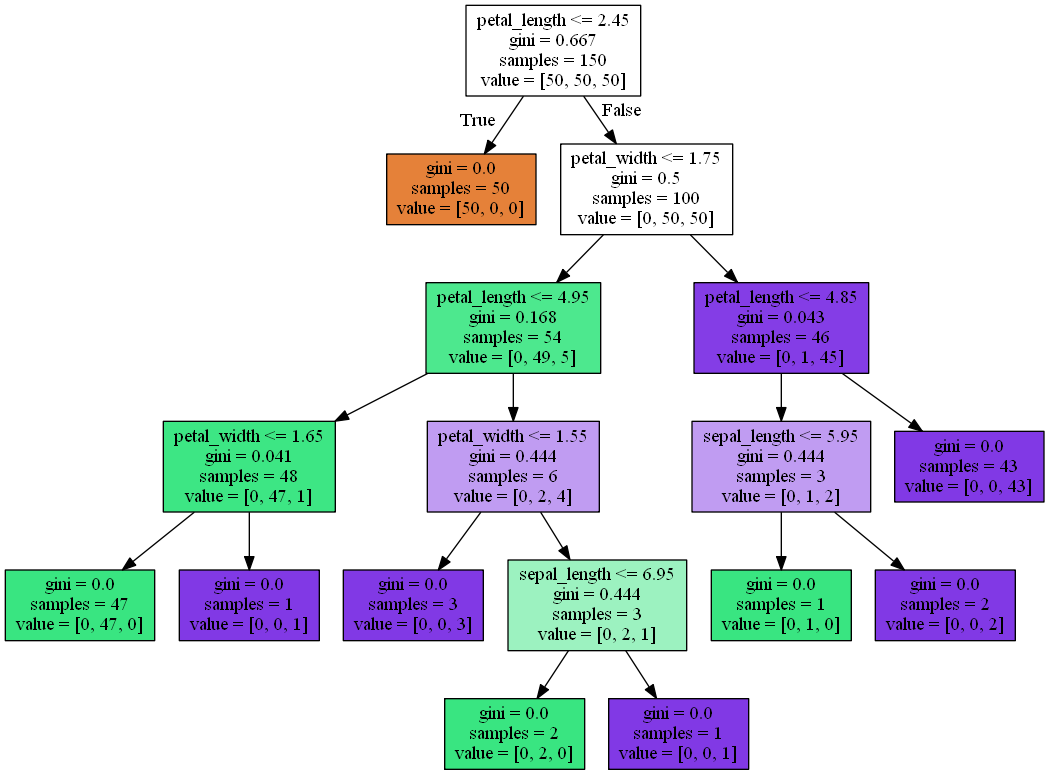

In [5]:
'''
Using graphviz to visualise the decision tree, If this section won't execute it's probably due to not having required
dependencies, that's why I've included plt.subplot version above - though I do believe the graphbiz looks better.
'''
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = export_graphviz(iris_model, out_file=None,  
                filled=True, rounded=False,
                feature_names=feature_names,
                label='all')
graph = pydotplus.graph_from_dot_data(dot_data)  

Image(graph.create_png())

Now I'm going to try to validate my model, to do this I will split my data into training and validation groups, the training data will go into the model, the validating data will be left to the side to later act as a test for how accurate our model is.

In [6]:
from sklearn.model_selection import train_test_split

# Supplying a numeric value to the random_state argument guarantees we get the same split every time this script is ran.
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=0)
# Define model
iris_model = DecisionTreeClassifier(random_state=0)
# Fit model
iris_model.fit(train_X, train_y)

print("Model score, how accurate it is when tested with the validation data:")
print(iris_model.score(val_X, val_y))

# get predicted category on validation data
print("Using the validation X data what predictions we get for species:")
val_predictions = iris_model.predict(val_X)
#print the predicted values for Y
print(val_predictions)

Model score, how accurate it is when tested with the validation data:
0.9736842105263158
Using the validation X data what predictions we get for species:
['Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-setosa' 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor'
 'Iris-setosa' 'Iris-virginica']


[Text(1240.0, 2718.0, 'petal_length <= 2.35\ngini = 0.665\nsamples = 112\nvalue = [37, 34, 41]\nclass = Iris-virginica'),
 Text(930.0, 2114.0, 'gini = 0.0\nsamples = 37\nvalue = [37, 0, 0]\nclass = Iris-setosa'),
 Text(1550.0, 2114.0, 'petal_length <= 4.95\ngini = 0.496\nsamples = 75\nvalue = [0, 34, 41]\nclass = Iris-virginica'),
 Text(620.0, 1510.0, 'petal_width <= 1.65\ngini = 0.153\nsamples = 36\nvalue = [0, 33, 3]\nclass = Iris-versicolor'),
 Text(310.0, 906.0, 'gini = 0.0\nsamples = 32\nvalue = [0, 32, 0]\nclass = Iris-versicolor'),
 Text(930.0, 906.0, 'sepal_width <= 3.1\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]\nclass = Iris-virginica'),
 Text(620.0, 302.0, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]\nclass = Iris-virginica'),
 Text(1240.0, 302.0, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]\nclass = Iris-versicolor'),
 Text(2480.0, 1510.0, 'petal_length <= 5.05\ngini = 0.05\nsamples = 39\nvalue = [0, 1, 38]\nclass = Iris-virginica'),
 Text(2170.0, 906.0, 'sepal_length <= 6.

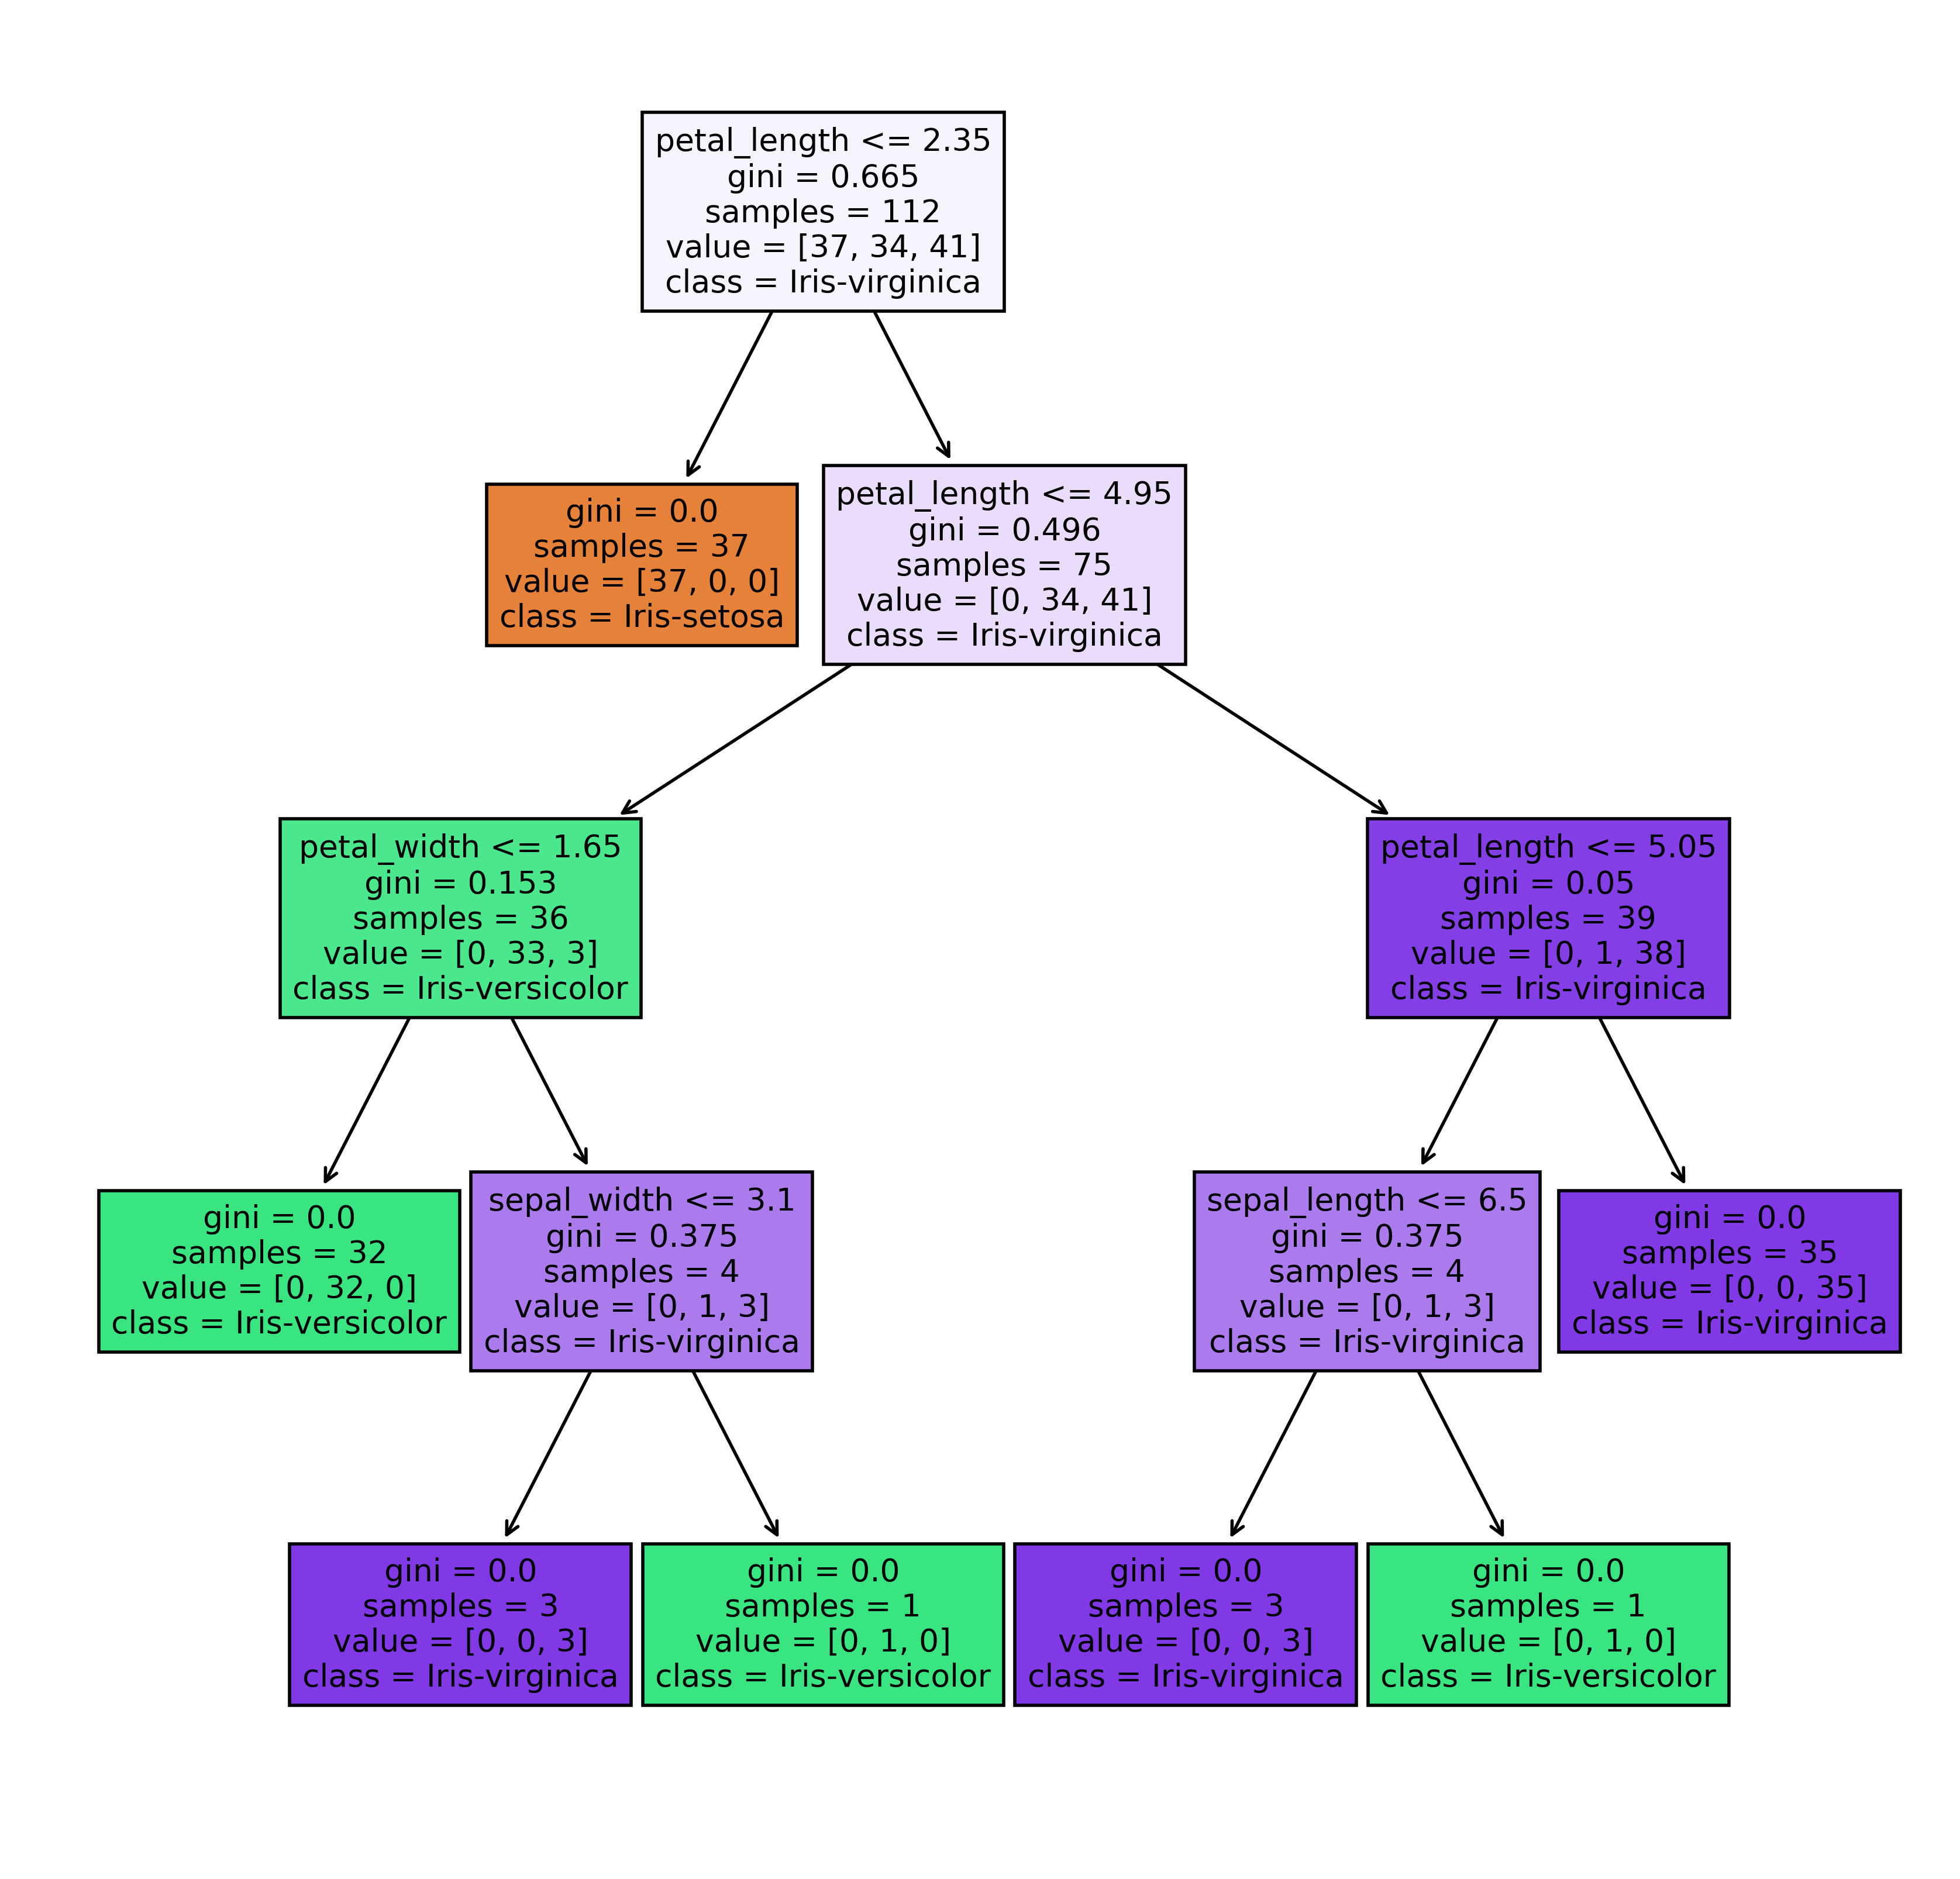

In [7]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,10), dpi=400)
tree.plot_tree(iris_model,
               feature_names = feature_names, 
               class_names=species_names,
               filled = True)

In [8]:
#compare whether the two are returning the same values at each index, this is to visually show whether we've matches or not
true_count = 0
for i in range(len(val_y)):
    if val_y.iloc[i] == val_predictions[i]:
        true_count += 1

print("Accuracy of our model on validation data")
print(f"{true_count/len(val_y)}")

Accuracy of our model on validation data
0.9736842105263158


I'm going to add a function next to take in our training and validating data and also use a max_leaf_node argument

In [9]:
def get_score(max_leaf_nodes, train_X, val_X, train_y, val_y):
    model = DecisionTreeClassifier(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    model_score = model.score(val_X, val_y)
    return(model_score)

Going to use this function then to try determine the max amount of leaf nodes to have in my decision tree model

In [10]:
candidate_max_leaf_nodes = list(range(2,10))
# Write loop to find the ideal tree size from candidate_max_leaf_nodes
leaf_score_dict = {}
for i in candidate_max_leaf_nodes:
    test = get_score(i, train_X, val_X, train_y, val_y)
    leaf_score_dict[i] = test
    
# Store the best value of max_leaf_nodes something from 2-9
best_leaf_node_count = int(max(leaf_score_dict, key=leaf_score_dict.get))
print("\nThe accuracy of different max leaf nodes:")
print(leaf_score_dict)
print("\nThe optimal number of leaf nodes is:")
print(best_leaf_node_count)
best_tree_size = best_leaf_node_count


The accuracy of different max leaf nodes:
{2: 0.5789473684210527, 3: 0.8947368421052632, 4: 0.9736842105263158, 5: 0.9736842105263158, 6: 0.9736842105263158, 7: 0.9736842105263158, 8: 0.9736842105263158, 9: 0.9736842105263158}

The optimal number of leaf nodes is:
4


So it look's like 4 is the best number of nodes, and printing all the mean absolute error for the different nodes shows us that it doesn't improve accuracy after 4

In [11]:
# Supplying a numeric value to the random_state argument guarantees we get the same split every time this script is ran.
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=0)
# Define model
iris_model = DecisionTreeClassifier(random_state=0, max_leaf_nodes=4)
# Fit model
iris_model.fit(train_X, train_y)

# get predicted category on validation data
val_predictions = iris_model.predict(val_X)
#print the predicted values for Y
print(val_predictions)

['Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-setosa' 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor'
 'Iris-setosa' 'Iris-virginica']


In [12]:
#get the model score like before to show that with limit of 4 on max leaves we still have same score/accuracy
print(iris_model.score(val_X, val_y))

0.9736842105263158


[Text(1240.0, 2642.5, 'petal_length <= 2.35\ngini = 0.665\nsamples = 112\nvalue = [37, 34, 41]\nclass = Iris-virginica'),
 Text(620.0, 1887.5, 'gini = 0.0\nsamples = 37\nvalue = [37, 0, 0]\nclass = Iris-setosa'),
 Text(1860.0, 1887.5, 'petal_length <= 4.95\ngini = 0.496\nsamples = 75\nvalue = [0, 34, 41]\nclass = Iris-virginica'),
 Text(1240.0, 1132.5, 'petal_width <= 1.65\ngini = 0.153\nsamples = 36\nvalue = [0, 33, 3]\nclass = Iris-versicolor'),
 Text(620.0, 377.5, 'gini = 0.0\nsamples = 32\nvalue = [0, 32, 0]\nclass = Iris-versicolor'),
 Text(1860.0, 377.5, 'gini = 0.375\nsamples = 4\nvalue = [0, 1, 3]\nclass = Iris-virginica'),
 Text(2480.0, 1132.5, 'gini = 0.05\nsamples = 39\nvalue = [0, 1, 38]\nclass = Iris-virginica')]

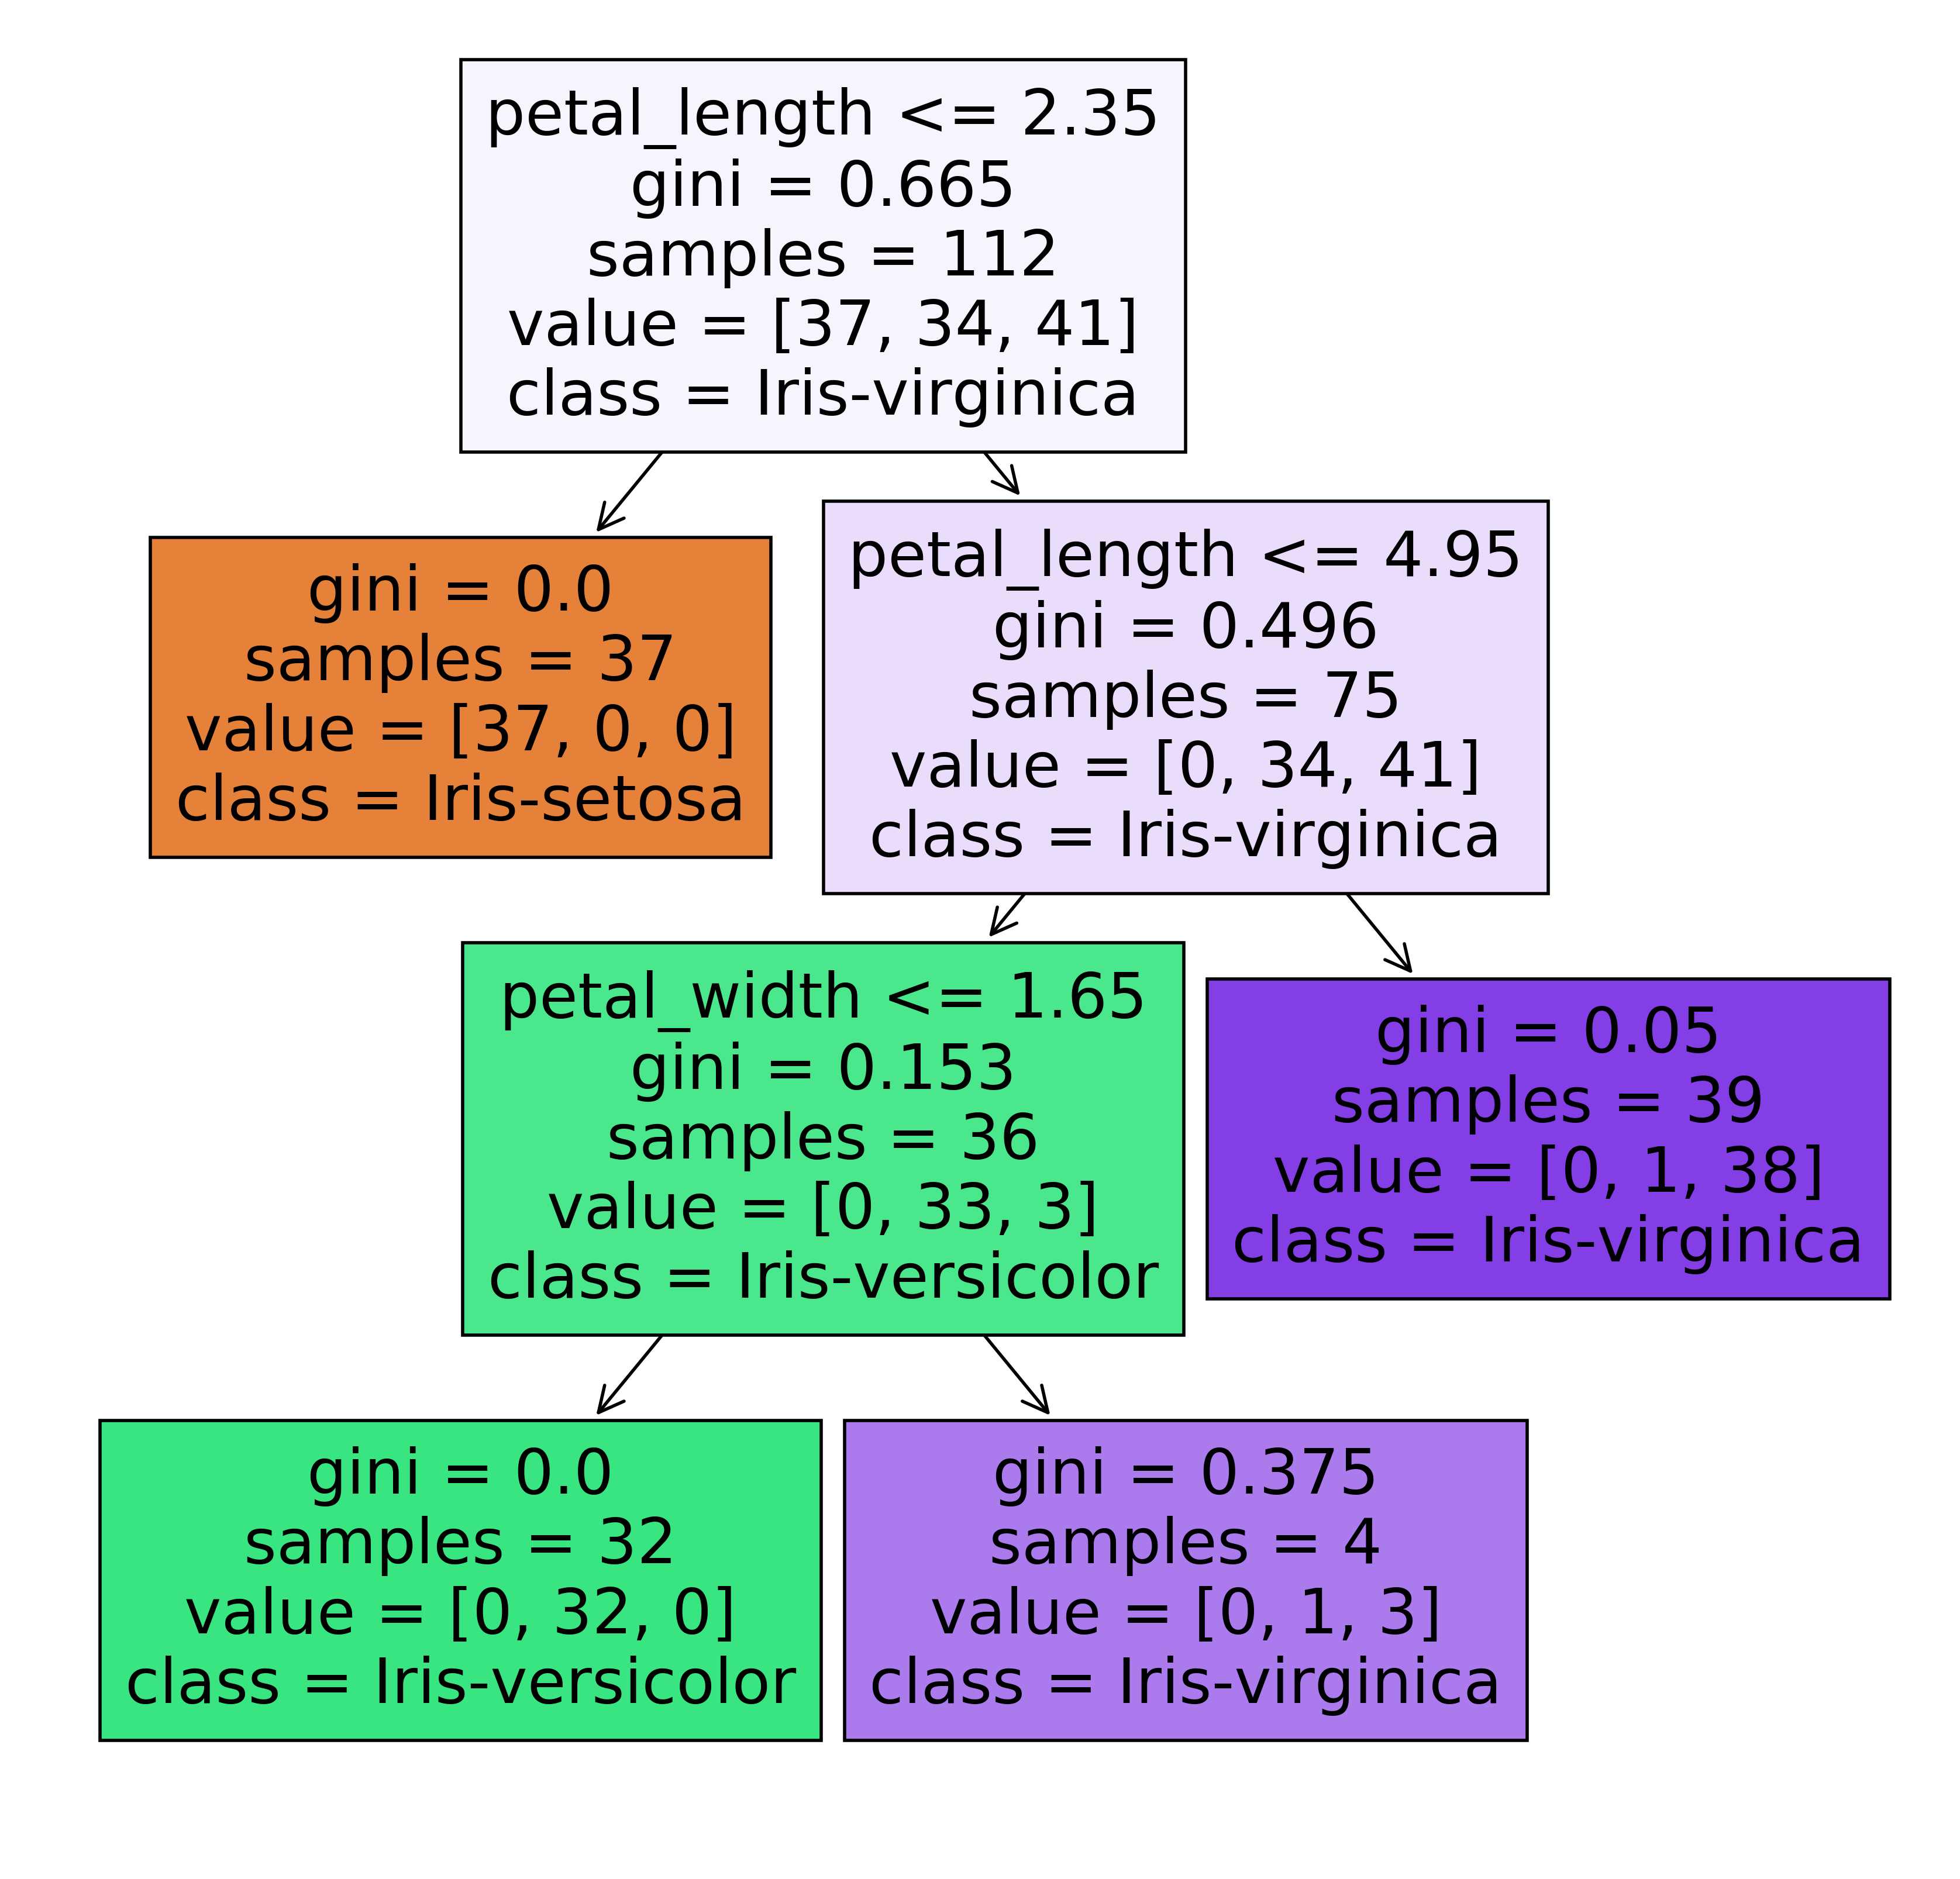

In [13]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,10), dpi=400)
tree.plot_tree(iris_model,
               feature_names = feature_names, 
               class_names=species_names,
               filled = True)

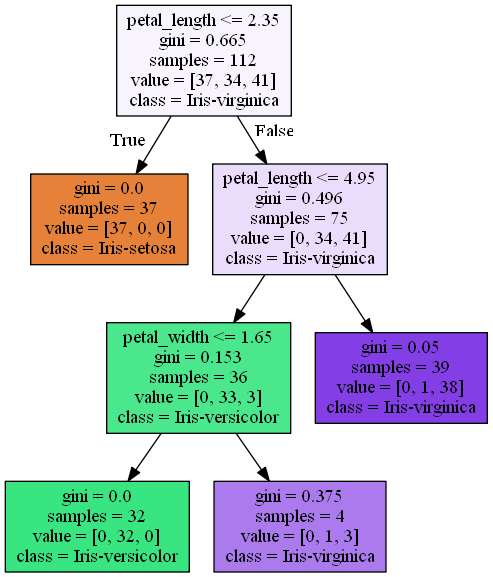

As we can see, we have a much more compact decision tree now but is as accurate as the earlier one which had no limit.

In [17]:
bad_feature_names = ['sepal_length', 'sepal_width']
#X is a dataframe of just the columns from feature_names
bad_X = iris_df[bad_feature_names]

# Supplying a numeric value to the random_state argument guarantees we get the same split every time this script is ran.
train_X, val_X, train_y, val_y = train_test_split(bad_X, y, random_state=0)

#define iris_model object from DecisionTreeRegressor, using random_state=0 as it makes the result consistent
bad_iris_model = DecisionTreeClassifier(random_state=0)

bad_iris_model.fit(bad_X,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [18]:
candidate_max_leaf_nodes = list(range(2,10))
# Write loop to find the ideal tree size from candidate_max_leaf_nodes
leaf_score_dict = {}
for i in candidate_max_leaf_nodes:
    test = get_score(i, train_X, val_X, train_y, val_y)
    leaf_score_dict[i] = test
    
# Store the best value of max_leaf_nodes something from 2-9
best_leaf_node_count = int(max(leaf_score_dict, key=leaf_score_dict.get))
print("\nThe accuracy of different max leaf nodes:")
print(leaf_score_dict)
print("\nThe optimal number of leaf nodes is:")
print(best_leaf_node_count)
best_tree_size = best_leaf_node_count


The accuracy of different max leaf nodes:
{2: 0.5263157894736842, 3: 0.5263157894736842, 4: 0.5789473684210527, 5: 0.631578947368421, 6: 0.631578947368421, 7: 0.631578947368421, 8: 0.631578947368421, 9: 0.631578947368421}

The optimal number of leaf nodes is:
5


In [22]:
# Supplying a numeric value to the random_state argument guarantees we get the same split every time this script is ran.
train_X, val_X, train_y, val_y = train_test_split(bad_X, y, random_state=0)
# Define model
bad_iris_model = DecisionTreeClassifier(random_state=0, max_leaf_nodes=5)
# Fit model
bad_iris_model.fit(train_X, train_y)

# get predicted category on validation data
val_predictions = bad_iris_model.predict(val_X)
#print the predicted values for Y
print(val_predictions)

['Iris-versicolor' 'Iris-virginica' 'Iris-setosa' 'Iris-virginica'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-setosa' 'Iris-setosa' 'Iris-virginica'
 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica' 'Iris-setosa'
 'Iris-setosa' 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor'
 'Iris-setosa' 'Iris-virginica']


[Text(1550.0, 2642.5, 'sepal_length <= 5.45\ngini = 0.665\nsamples = 112\nvalue = [37, 34, 41]\nclass = Iris-virginica'),
 Text(775.0, 1887.5, 'sepal_width <= 2.75\ngini = 0.193\nsamples = 38\nvalue = [34, 3, 1]\nclass = Iris-setosa'),
 Text(387.5, 1132.5, 'gini = 0.56\nsamples = 5\nvalue = [1, 3, 1]\nclass = Iris-versicolor'),
 Text(1162.5, 1132.5, 'gini = 0.0\nsamples = 33\nvalue = [33, 0, 0]\nclass = Iris-setosa'),
 Text(2325.0, 1887.5, 'sepal_length <= 5.95\ngini = 0.531\nsamples = 74\nvalue = [3, 31, 40]\nclass = Iris-virginica'),
 Text(1937.5, 1132.5, 'sepal_width <= 3.35\ngini = 0.442\nsamples = 25\nvalue = [3, 18, 4]\nclass = Iris-versicolor'),
 Text(1550.0, 377.5, 'gini = 0.298\nsamples = 22\nvalue = [0, 18, 4]\nclass = Iris-versicolor'),
 Text(2325.0, 377.5, 'gini = 0.0\nsamples = 3\nvalue = [3, 0, 0]\nclass = Iris-setosa'),
 Text(2712.5, 1132.5, 'gini = 0.39\nsamples = 49\nvalue = [0, 13, 36]\nclass = Iris-virginica')]

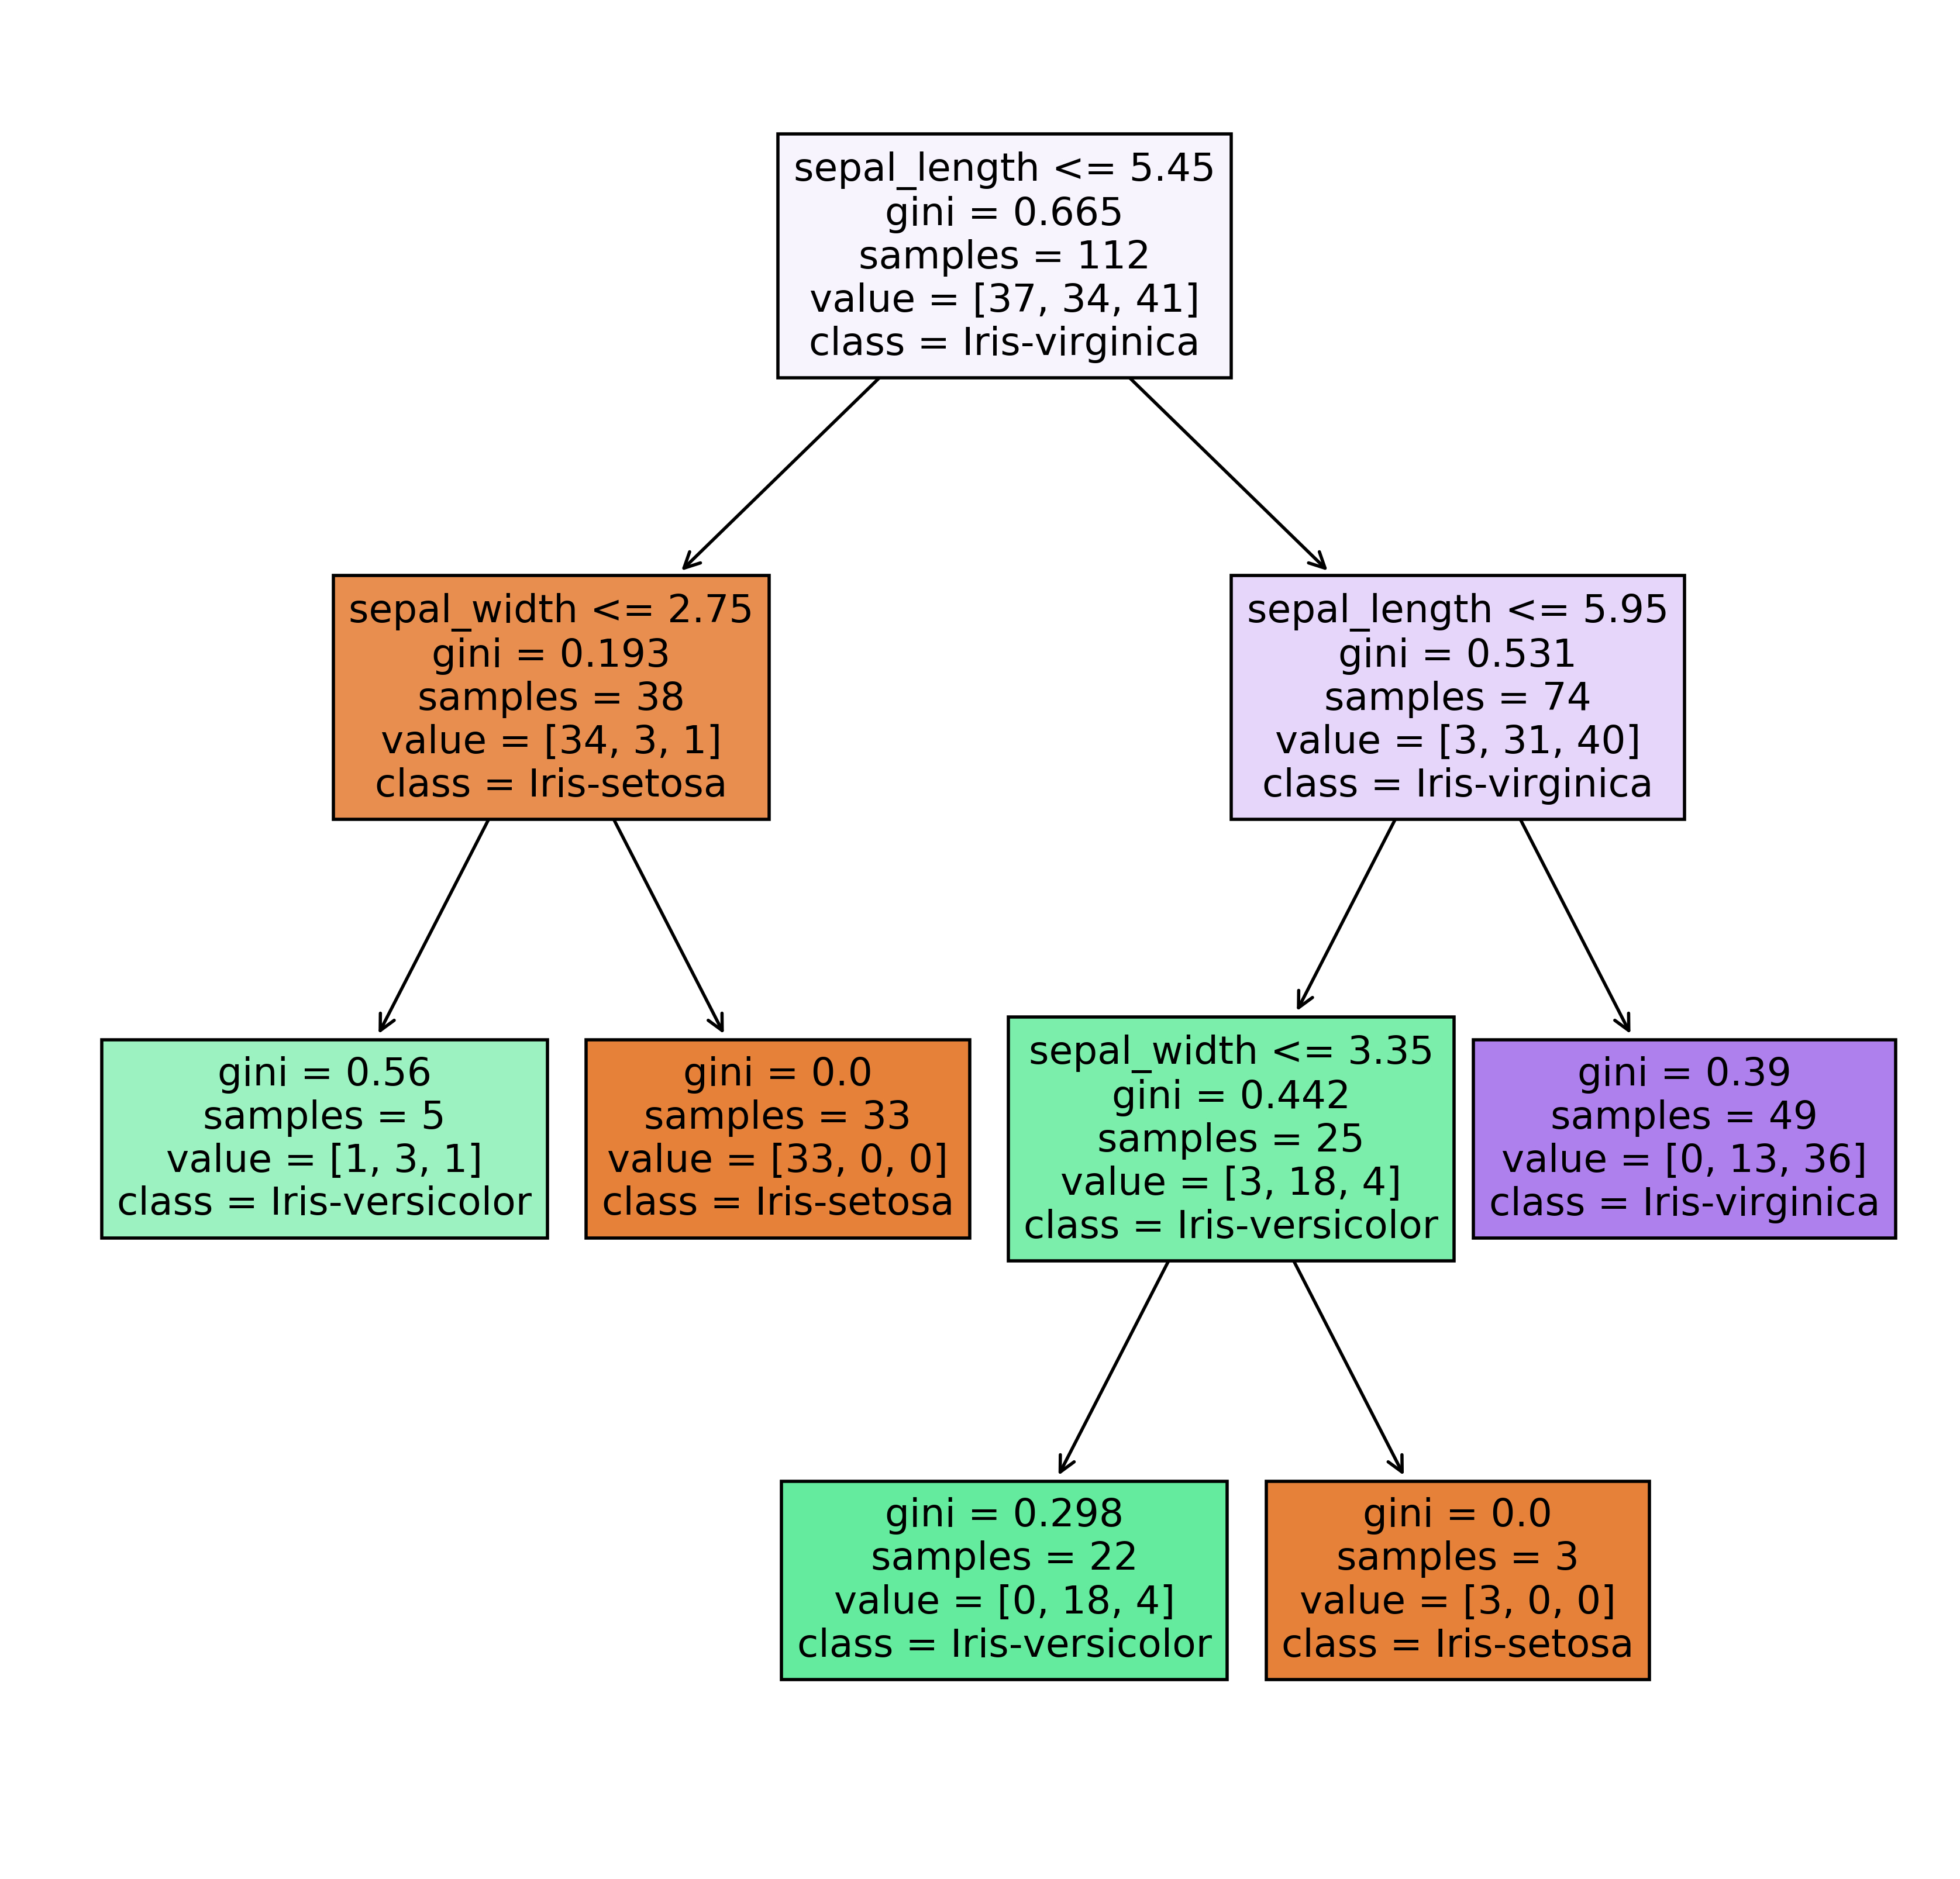

In [23]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,10), dpi=400)
tree.plot_tree(bad_iris_model,
               feature_names = bad_feature_names, 
               class_names=species_names,
               filled = True)